# Part 1

## Preliminary

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
np.random.seed(5432)

In [72]:
def activation_function(s):
    return 60 * (1 + np.tanh(s))

In [73]:
import os
os.makedirs("figures", exist_ok=True)

## Question 1: Plot the activation function

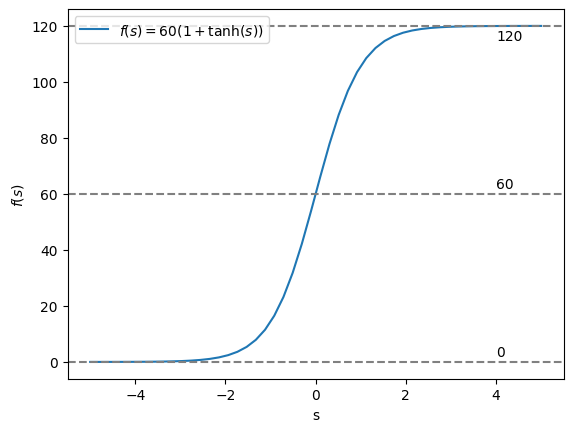

In [74]:
s = np.linspace(-5, 5)
plt.xlabel("s")
plt.ylabel("$f(s)$")
plt.plot(s, activation_function(s), label="$f(s)=60(1+\\tanh(s))$")
plt.axhline(0, linestyle='--', color="gray")
plt.axhline(60, linestyle='--', color="gray")
plt.axhline(120, linestyle='--', color="gray")
plt.annotate("0", (4, 2))
plt.annotate("60", (4, 62))
plt.annotate("120", (4, 115))
plt.legend()
plt.savefig("figures/tanh.svg")
plt.show()

## Question 2: Study the dynamics

In [75]:
omega = 0.05
I = -3
def f(t, y):
    return -y + activation_function(omega * y + I)

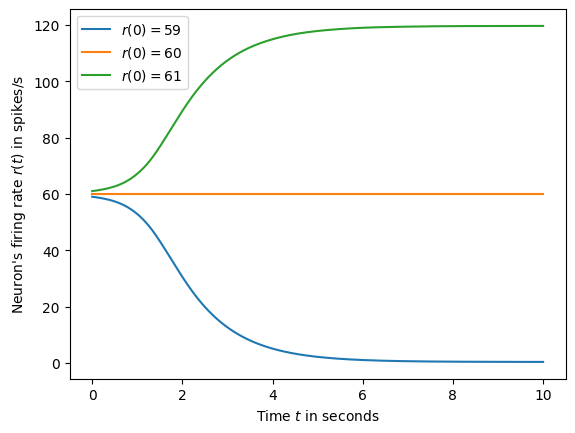

In [76]:
t0 = 0
tf = 10
for r0 in [59, 60, 61]:
    sol = solve_ivp(f, [t0, tf], [r0], vectorized = True, dense_output=True)
    t = np.linspace(t0, tf, num=1000)
    plt.plot(t, sol.sol(t)[0], label="$r(0)={}$".format(r0))
plt.xlabel("Time $t$ in seconds")
plt.ylabel("Neuron's firing rate $r(t)$ in spikes/s")
plt.legend()
plt.savefig("figures/part1_dynamics_without_noise.svg")
plt.show()

## Question 3: With noise

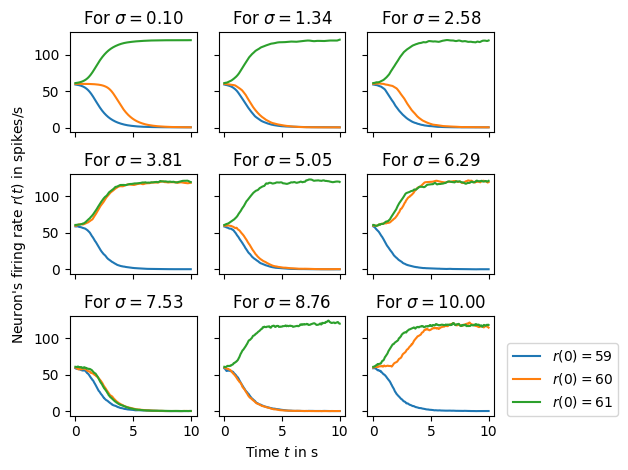

In [77]:
sigma = 0.3
def f_with_noise(sigma):
    return lambda t, y: -y + activation_function(omega * y + I) + sigma * np.random.normal()

t0 = 0
tf = 10
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
for i, sigma in enumerate(np.linspace(0.1, 10, num=9)):
    for r0 in [59, 60, 61]:
        sol = solve_ivp(f_with_noise(sigma), [t0, tf], [r0], vectorized = True, dense_output=True)
        t = np.linspace(t0, tf, num=1000)
        axs[i // 3][i % 3].plot(t, sol.sol(t)[0], label="$r(0)={}$".format(r0))
    axs[i // 3][i % 3].set_title("For $\\sigma={:.2f}$".format(sigma))
    
axs[2][1].set_xlabel("Time $t$ in s")
axs[1][0].set_ylabel("Neuron's firing rate $r(t)$ in spikes/s")
plt.legend(loc=(1.1, 0))
plt.tight_layout()
plt.savefig("figures/part1_dynamics_with_noise.svg")
plt.show()

## Question 4: Study the flux (state space)

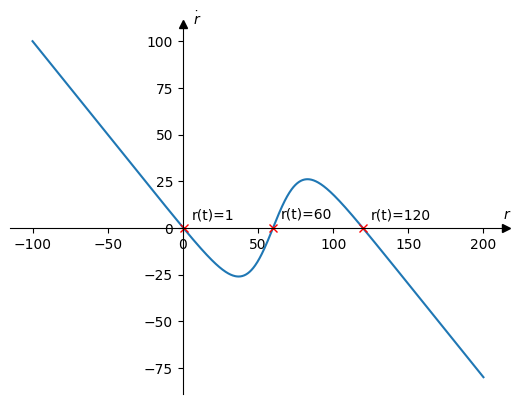

In [78]:
def deriv(r):
    return -r + activation_function(omega * r + I)

r = np.linspace(-100, 200, num=1000)
y = deriv(r)
fig, ax = plt.subplots()
ax.plot(r, y)

for i in range(1, len(y) - 1):
    if y[i] * y[i-1] <= 0:
        ax.plot([r[i]], [y[i]], "xr")
        ax.text(r[i] + 5, y[i] + 5, "r(t)={:.0f}".format(r[i]))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.annotate("$r$", (213, 5), clip_on=False)
ax.annotate("$\\dot{r}$", (7, 109), clip_on=False)
plt.savefig("figures/part1_flux.svg")
plt.show()

## Question 5: Bifurcation diagram

In [67]:
def count_zeros(y):
    cpt = 0
    for i in range(1, len(y) - 1):
        if y[i] * y[i-1] <= 0:
            cpt += 1
    return cpt

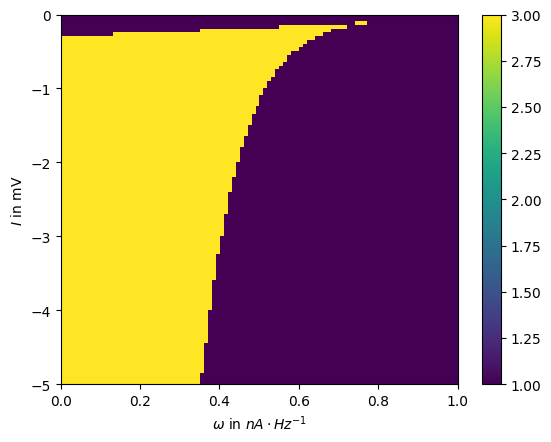

In [68]:
zeros = np.zeros((100, 100))
for i, omega in enumerate(np.linspace(0, 1, num=100)):
    for j, I in enumerate(np.linspace(-5, 0, num=100)):
        def deriv(r):
            return -r + activation_function(omega * r + I)
        
        r = np.linspace(-100, 200, num=1000)
        y = deriv(r)
        zeros[i][j] = count_zeros(y)

# Bifurcation diagram
plt.imshow(zeros, extent=(0, 1, -5, 0), aspect='auto')
plt.colorbar()
plt.xlabel("$\\omega$ in $nA\\cdot Hz^{-1}$")
plt.ylabel("$I$ in mV")
plt.savefig("figures/part1_bifurcation_diagram.svg")
plt.show()